Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
silver_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
# print first 5 rows in the dataframe
silver_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe
silver_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
silver_data.shape

(2290, 6)

In [ ]:
# getting some basic informations about the data
silver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing values
silver_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting the statistical measures of the data
silver_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = silver_data.corr()

<ipython-input-113-0b17aafec16f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = silver_data.corr()


<Axes: >

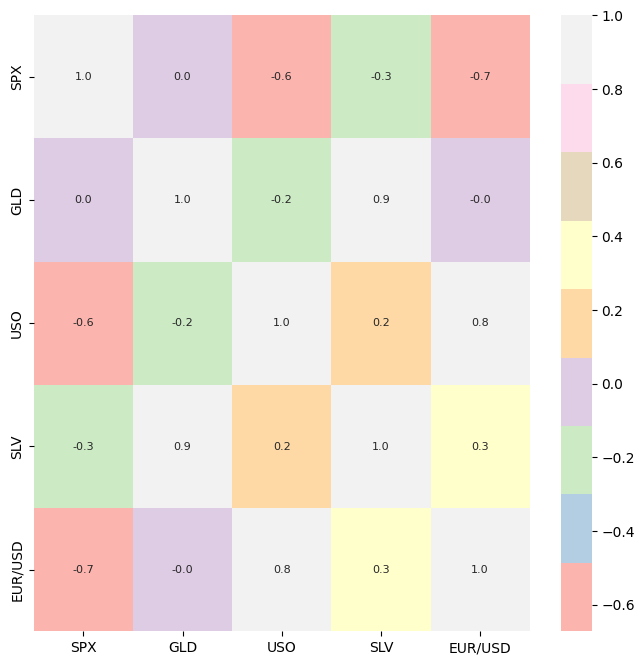

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=False, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Pastel1')

In [ ]:
# correlation values of SLV
print(correlation['SLV'])

SPX       -0.274055
GLD        0.866632
USO        0.167547
SLV        1.000000
EUR/USD    0.321631
Name: SLV, dtype: float64


<ipython-input-128-9056e469f325>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(silver_data['SLV'],color='blue')


<Axes: xlabel='SLV', ylabel='Density'>

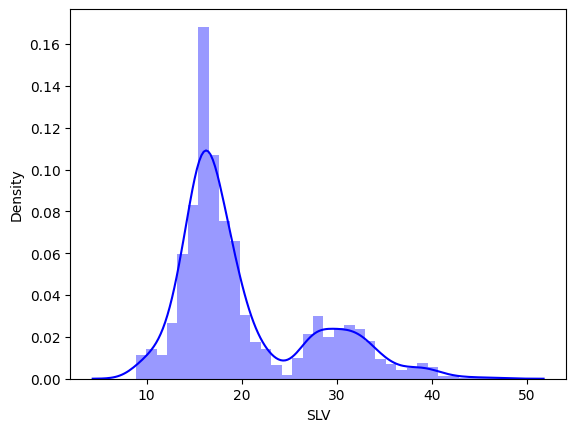

In [ ]:
# checking the distribution of the SLV Price
sns.distplot(silver_data['SLV'],color='blue')

Splitting the Features and Target

In [ ]:
X = silver_data.drop(['Date','SLV'],axis=1)
Y = silver_data['SLV']

In [ ]:
print(X)

              SPX         GLD        USO   EUR/USD
0     1447.160034   84.860001  78.470001  1.471692
1     1447.160034   85.570000  78.370003  1.474491
2     1411.630005   85.129997  77.309998  1.475492
3     1416.180054   84.769997  75.500000  1.468299
4     1390.189941   86.779999  76.059998  1.557099
...           ...         ...        ...       ...
2285  2671.919922  124.589996  14.060000  1.186789
2286  2697.790039  124.330002  14.370000  1.184722
2287  2723.070068  125.180000  14.410000  1.191753
2288  2730.129883  124.489998  14.380000  1.193118
2289  2725.780029  122.543800  14.405800  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0       15.1800
1       15.2850
2       15.1670
3       15.0530
4       15.5900
         ...   
2285    15.5100
2286    15.5300
2287    15.7400
2288    15.5600
2289    15.4542
Name: SLV, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[32.68219995 13.72866998 14.63859999 18.49839986 17.2318999  26.47450016
 35.38620009 16.7506997  16.88790017 19.95009984 15.7475     35.89589946
 22.92210012 32.78819891 15.98319986 16.68980006 28.9062993  32.43979974
 30.07269953 34.30710121 27.55759996 20.15909958 41.42140075 38.90329925
 16.11539979 14.45410001 11.3673     18.7886001  16.59019976 31.86330011
 12.1365     16.16080009 17.40006035 14.46       18.20039991 27.93120009
 16.05699996 15.37889999 27.66870001 14.207      15.44210003 16.8710801
 15.61840004 17.67840003 29.19639945 19.18969954 13.9382     14.1099
 18.24282996 20.23259975  9.3314     15.47179999 16.60349995 14.8672
 15.71329999 18.62310012 29.90259985 37.55409953 44.74740127 16.22041964
 18.06010985 16.29235972 13.2159     14.99619999 15.79580004 20.9381997
 34.22760024 16.1425     15.93949996 16.15140002 31.90890007 39.02859983
 23.16879985 18.63829959 18.72269983 19.24859981 15.75509992 16.02219999
 14.0379     18.8316998  16.22449979 16.86929972 18.54429976 

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9934567135962753


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

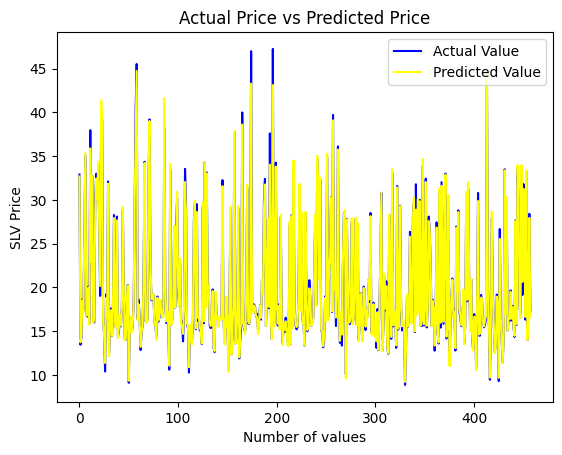

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('SLV Price')
plt.legend()
plt.show()